In [61]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import os
sns.set()

In [2]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?

In [4]:
# Perceptron model
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [6]:
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
 X_train_full.shape

(60000, 28, 28)

In [9]:
# feature scaling & validation set creation
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
### Keras Model Sequential  -- stacking layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
### Keras Model Sequential  -- list of layers
# model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
#                                  keras.layers.Dense(300, activation="relu"),
#                                  keras.layers.Dense(100, activation="relu"),
#                                  keras.layers.Dense(10, activation="softmax")
#                                 ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
# first layer param
784 * 300 + 300    # +300 bias term

235500

In [15]:
## second layers param
300 * 100 + 100

30100

In [16]:
model.layers

In [17]:
model.layers[1].name

'dense'

In [18]:
 model.get_layer('dense').name

'dense'

In [19]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

In [24]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5341 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4126 - accuracy: 0.8565 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3940 - accuracy: 0.8618 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3753 - accuracy: 0.8677 - val_loss: 0.3707 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3633 - accuracy: 0.8715 - val_loss: 0.3623 - val_accuracy:

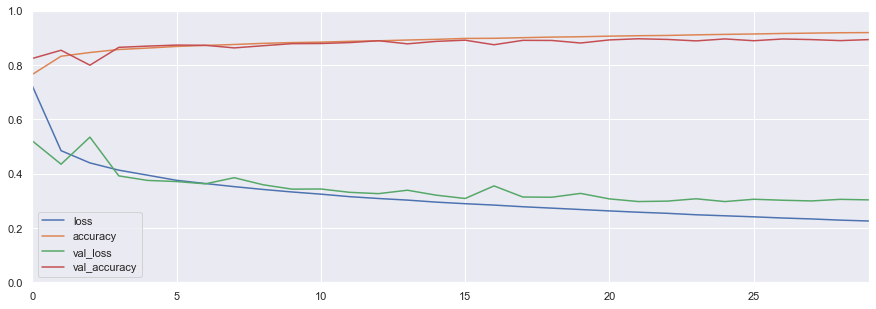

In [26]:
pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 78.9946 - accuracy: 0.8294


[78.99458312988281, 0.8294000029563904]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = np.argmax(model.predict(X_new),axis=1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
# preparaing data for regression

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
# ANN for regression
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])

model.compile(loss="mean_squared_error", optimizer='rmsprop')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 22043.9473 - val_loss: 8.5689
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 47.2472 - val_loss: 4.3033
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 47.0789 - val_loss: 5.6353
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 45.0282 - val_loss: 7.6293
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 48.6190 - val_loss: 32.6265
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 42.7955 - val_loss: 19.8680
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 45.0575 - val_loss: 27.4110
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 52.4177 - val_loss: 1.5153
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 42.8383 - val_loss: 8.0325
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 37.3185 - 

In [33]:
print(mse_test)
print(y_pred)

0.8907460570335388
[[1.0866421]
 [1.7713727]
 [1.8141049]]


In [34]:
# Wide and Deep Neural Network using functional API with one input
model_in = keras.layers.Input(shape=X_train.shape[1:])

hidden1 = keras.layers.Dense(30, activation="relu")(model_in)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.Concatenate()([model_in, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[model_in], outputs=[output])

In [35]:
model.compile(loss="mean_squared_error", optimizer='rmsprop')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

print(mse_test)
print(y_pred)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 147.0075 - val_loss: 2.9851
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 90.2154 - val_loss: 1.3150
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 81.9733 - val_loss: 0.8356
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 71.1933 - val_loss: 55.3695
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 80.1836 - val_loss: 25.4222
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 48.8046 - val_loss: 0.8021
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 49.3656 - val_loss: 8.4368
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 42.1042 - val_loss: 5.3831
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 41.9673 - val_loss: 0.7604
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 37.0259 - val

In [36]:
# Wide and Deep Neural Network using functional API with two inputs

input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.compile(loss="mse", optimizer="rmsprop")

In [37]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

print(mse_test)
print(y_pred)          

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2535.0195 - val_loss: 8.2356
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 123.8016 - val_loss: 8.6486
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 109.1110 - val_loss: 2.8909
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 94.3956 - val_loss: 3.3478
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 91.5698 - val_loss: 45.9808
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 51.1935 - val_loss: 280.8838
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 44.9423 - val_loss: 1.8714
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 53.3369 - val_loss: 6.5302
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 36.9041 - val_loss: 12.1785
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 35.0788 

In [38]:
# model with two input and two output
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)

aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

# multiple output
model = keras.models.Model(inputs=[input_A, input_B],outputs=[output, aux_output])

In [39]:
# loss and weight for each output 
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="rmsprop")

In [40]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 456.4582 - main_output_loss: 484.7685 - aux_output_loss: 201.6651 - val_loss: 49.0452 - val_main_output_loss: 52.2290 - val_aux_output_loss: 20.3904
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 143.0918 - main_output_loss: 153.4250 - aux_output_loss: 50.0928 - val_loss: 7.8384 - val_main_output_loss: 7.1844 - val_aux_output_loss: 13.7246
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 126.5891 - main_output_loss: 135.5635 - aux_output_loss: 45.8188 - val_loss: 5.0849 - val_main_output_loss: 4.5745 - val_aux_output_loss: 9.6786
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 87.5134 - main_output_loss: 92.8687 - aux_output_loss: 39.3158 - val_loss: 3.1866 - val_main_output_loss: 2.7894 - val_aux_output_loss: 6.7607
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 83.5235 - main_output_loss: 86.6924 - aux_outpu

In [41]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
total_loss, main_loss, aux_loss 

162/162 [==============================] - 0s 1ms/step - loss: 0.7698 - main_output_loss: 0.6882 - aux_output_loss: 1.5039


(0.7698028683662415, 0.6882373690605164, 1.5038928985595703)

In [42]:
0.9*main_loss + 0.1 * aux_loss

0.7698029220104218

In [43]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, 

(array([[1.1734118],
        [1.597095 ],
        [2.1400104]], dtype=float32),)

In [44]:
y_pred_aux

array([[1.2522546],
       [1.4913131],
       [1.2300426]], dtype=float32)

In [45]:
### Model building using subclassing API
class WideAndDeepModel(keras.models.Model):

    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
       
        concat = keras.layers.concatenate([input_A, hidden2])
        
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

sub_class_model = WideAndDeepModel()

In [46]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

sub_class_model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer='rmsprop')

history = sub_class_model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                              validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

total_loss, main_loss, aux_loss = sub_class_model.evaluate((X_test_A, X_test_B), (y_test, y_test))

y_pred_main, y_pred_aux = sub_class_model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 261.5790 - output_1_loss: 263.7236 - output_2_loss: 242.2760 - val_loss: 6.4824 - val_output_1_loss: 6.6376 - val_output_2_loss: 5.0853
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 165.2875 - output_1_loss: 182.4976 - output_2_loss: 10.3961 - val_loss: 272.5189 - val_output_1_loss: 301.8724 - val_output_2_loss: 8.3383
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 155.1221 - output_1_loss: 171.3842 - output_2_loss: 8.7643 - val_loss: 15.3073 - val_output_1_loss: 16.6669 - val_output_2_loss: 3.0710
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 130.9639 - output_1_loss: 144.6144 - output_2_loss: 8.1090 - val_loss: 6.2793 - val_output_1_loss: 6.4602 - val_output_2_loss: 4.6515
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 146.7577 - output_1_loss: 161.3253 - output_2_loss: 15.6495 - val_loss: 34.8653 - val

In [47]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=[8]),
                                 keras.layers.Dense(30, activation="relu"),
                                 keras.layers.Dense(1)])

model.compile(loss="mse", optimizer='rmsprop')
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 672.7534 - val_loss: 82.4977
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 381.5422 - val_loss: 1086.3650
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 328.2492 - val_loss: 13.7559
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 275.6665 - val_loss: 22.9317
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 270.0629 - val_loss: 19.3198
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 218.5030 - val_loss: 620.9624
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 182.2321 - val_loss: 3.1678
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 237.4891 - val_loss: 6.0228
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 175.4698 - val_loss: 1.8787
Epoch 10/10
162/162 [==============================] - 0s 675us/step - lo

In [48]:
# saving & restoring model
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")

In [49]:
# callbacks to save checkpoint
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 142.4475
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 127.6945
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 118.3889
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 105.9028
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 99.4294
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 72.9203
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 58.1188
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 54.7203
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 44.4880
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 37.4061


In [50]:
# early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 43.0082 - val_loss: 1.5227
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 35.0147 - val_loss: 29.5000
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 34.7994 - val_loss: 1.7463
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 31.9502 - val_loss: 4.1358
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 43.8798 - val_loss: 10.3506
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 27.5931 - val_loss: 132.9028
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 24.6392 - val_loss: 13.4895
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 29.3407 - val_loss: 4.6200
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 21.4222 - val_loss: 1.0363
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 2

In [51]:
# Tensorboard
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

In [52]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=[8]),
                                 keras.layers.Dense(30, activation="relu"),
                                 keras.layers.Dense(1)])

model.compile(loss="mse", optimizer='rmsprop')

In [53]:
# run tensorboard command :  tensorboard --logdir=./my_logs --port=6006
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid),callbacks=[tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 63714.3125WARNING:tensorflow:From c:\program files\python36\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 4ms/step - loss: 382.9419 - val_loss: 53.3961
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 111.5775 - val_loss: 79.1232
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 90.7779 - val_loss: 2.3024
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 71.5392 - val_loss: 1.8784
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 90.3656 - val_loss: 24.7476
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 48.2158 - val_loss: 5.1613
Epoch 7/30
363/363 [=================

In [62]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
## Hyperparameter tunning
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
    options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.RMSprop()
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [64]:
# sklearn warapper
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

# keras_reg.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),
#               callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# mse_test = keras_reg.score(X_test, y_test)

# y_pred = keras_reg.predict(X_new)

In [70]:
# # randmoized search

# param_distribs = {"n_hidden": [0, 1, 2, 3],"n_neurons": np.arange(1, 100),"learning_rate": reciprocal(3e-4, 3e-2),}

# rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

# rnd_search_cv.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),
#                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [67]:
rnd_search_cv.best_params_

{'learning_rate': 0.0006154014789262348, 'n_hidden': 2, 'n_neurons': 87}

In [68]:
rnd_search_cv.best_score_

-0.6136356790860494